In [14]:
# Import Libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import geopandas as gpd
import matplotlib.image as mpimg
from shapely.geometry import Point, LineString

In [15]:
pip install openpyxl

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


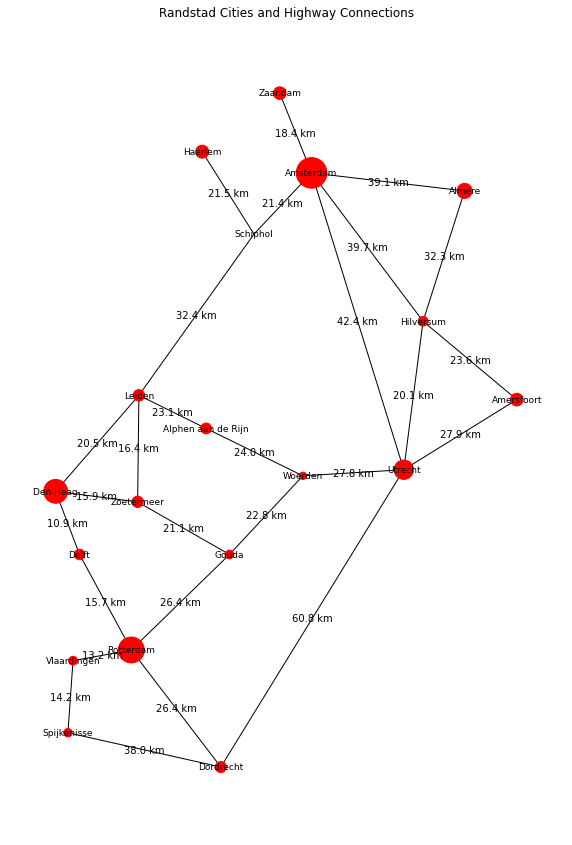

In [16]:
# Your cities and their geographical coordinates
cities_coords = {
    "Zaandam": (52.442, 4.829),
    "Amsterdam": (52.3676, 4.9041),
    "Haarlem": (52.3874, 4.6462),
    "Schiphol": (52.3105, 4.7683),
    "Leiden": (52.1601, 4.4970),
    "Den Haag": (52.0705, 4.3007),
    "Zoetermeer": (52.0607, 4.4940),
    "Delft": (52.0116, 4.3571),
    "Rotterdam": (51.9225, 4.4792),
    "Spijkenisse": (51.8453, 4.3297),
    "Dordrecht": (51.8133, 4.6901),
    "Vlaardingen": (51.9125, 4.3417),
    "Alphen aan de Rijn": (52.1292, 4.6555),
    "Gouda": (52.0116, 4.7105),
    "Woerden": (52.0850, 4.8836),
    "Utrecht": (52.0907, 5.1214),
    "Hilversum": (52.2292, 5.1669),
    "Almere": (52.3508, 5.2647),
    "Amersfoort": (52.1561, 5.3878),
}
connections = [
    (42.4, "Amsterdam", "Utrecht"),
    (32.4, "Leiden", "Schiphol"),
    (20.5, "Den Haag", "Leiden"),
    (21.1, "Gouda", "Zoetermeer"),
    (22.8, "Woerden", "Gouda"),
    (27.8, "Utrecht", "Woerden"),
    (10.9, "Den Haag", "Delft"),
    (18.4, "Amsterdam", "Zaandam"),
    (39.1, "Amsterdam", "Almere"),
    (39.7, "Amsterdam", "Hilversum"),
    (21.4, "Amsterdam", "Schiphol"),
    (32.3, "Almere", "Hilversum"),
    (23.6, "Amersfoort", "Hilversum"),
    (20.1, "Hilversum", "Utrecht"),
    (27.9, "Amersfoort", "Utrecht"),
    (21.5, "Haarlem", "Schiphol"),
    (23.1, "Leiden", "Alphen aan de Rijn"),
    (16.4, "Leiden", "Zoetermeer"),
    (24.0, "Woerden", "Alphen aan de Rijn"),
    (15.9, "Zoetermeer", "Den Haag"),
    (15.7, "Delft", "Rotterdam"),
    (26.4, "Rotterdam", "Gouda"),
    (13.2, "Rotterdam", "Vlaardingen"),
    (26.4, "Rotterdam", "Dordrecht"),
    (14.2, "Vlaardingen", "Spijkenisse"),
    (38.0, "Spijkenisse", "Dordrecht"),
    (60.8, "Dordrecht", "Utrecht"),
]
cities_population = {
    "Zaandam": 161429,
    "Amsterdam": 934927,
    "Haarlem": 167763,
    "Schiphol": 1,
    "Leiden": 130181,
    "Den Haag": 565701,
    "Zoetermeer": 128424,
    "Delft": 109573,
    "Rotterdam": 671125,
    "Spijkenisse": 71390,
    "Dordrecht": 122089,
    "Vlaardingen": 76472,
    "Alphen aan de Rijn": 114968,
    "Gouda": 75763,
    "Woerden": 53237,
    "Utrecht": 374411,
    "Hilversum": 94426,
    "Almere": 226630,
    "Amersfoort": 160747
}
# Create a networkx graph
G = nx.Graph()

# Add nodes to the graph
for city, (lat, lon) in cities_coords.items():
    population = cities_population.get(city, 0)  # Default to 0 if not found
    G.add_node(city, pos=(lon, lat), population=population, weight=population)
# Add edges to the graph
for distance, city1, city2 in connections:
    G.add_edge(city1, city2, weight=distance)

# Load the PNG image
#img = mpimg.imread('/path/to/your/SnelwegenNederland_2008.png')  # Update the path to the image

# Get positions for cities to use for layout
pos = nx.get_node_attributes(G, 'pos')

# Draw the graph
fig, ax = plt.subplots(figsize=(10, 15))
#ax.imshow(img, extent=[3.2, 7.4, 50.7, 53.7])  # You might need to adjust the extent to fit your image
node_sizes = [G.nodes[city]['population'] / 1000 for city in G.nodes]
# Draw the network
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='red', ax=ax)
nx.draw_networkx_labels(G, pos, font_size=9, ax=ax)
nx.draw_networkx_edges(G, pos, ax=ax)

# Annotate the edges with distances
for (city1, city2, data) in G.edges(data=True):
    edge_midpoint = [(pos[city1][0] + pos[city2][0]) / 2, (pos[city1][1] + pos[city2][1]) / 2]
    ax.text(edge_midpoint[0], edge_midpoint[1], f"{data['weight']} km", size=10, ha='center', va='center')

# Set the title and remove the axis
ax.set_title('Randstad Cities and Highway Connections')
plt.axis('off')  # Turn off the axis
plt.show()

In [19]:
# Code for part 3:
# Calculate eigenvector centrality
centrality = nx.eigenvector_centrality(G)
# Sort the nodes by eigenvector centrality values in descending order
sorted_centrality = sorted(centrality.items(), key=lambda item: item[1], reverse=True)

# Print the sorted centrality values
print("Eigenvector Centrality (sorted):")
for node, cent_value in sorted_centrality:
    print(f"Node {node}: {cent_value}")

Eigenvector Centrality (sorted):
Node Utrecht: 0.4630239130443246
Node Amsterdam: 0.43988693349842145
Node Hilversum: 0.42540892878717296
Node Amersfoort: 0.2650281273551886
Node Almere: 0.2581259975265145
Node Woerden: 0.2149145866023495
Node Dordrecht: 0.20691792078876856
Node Schiphol: 0.19681623270640866
Node Leiden: 0.16116868156368458
Node Rotterdam: 0.14835918906715603
Node Gouda: 0.14522217077253732
Node Zaandam: 0.13122250937025476
Node Zoetermeer: 0.12353618430608682
Node Alphen aan de Rijn: 0.11219064982972979
Node Den Haag: 0.10772133212317621
Node Spijkenisse: 0.08224799378148019
Node Delft: 0.0763928546788032
Node Vlaardingen: 0.06879328158983965
Node Haarlem: 0.058712519695516996


In [20]:
import pandas as pd

# Load the Excel file
file_path = 'rental price office per m2.xlsx'
df = pd.read_excel(file_path, usecols="B:C")
# Convert the centrality to a DataFrame for easier manipulation
centrality_df = pd.DataFrame(list(centrality.items()), columns=['City', 'Centrality'])

# Merge the Excel data with the centrality values based on city names
merged_df = pd.merge(df, centrality_df, on='City')

# Calculate the multiplied values
merged_df['Multiplied Value'] = merged_df['€/m2 per jaar'] * merged_df['Centrality']

# Sort the dataframe by 'Multiplied Value' in descending order
sorted_merged_df = merged_df.sort_values(by='Multiplied Value', ascending=False)

# Print the resulting DataFrame sorted by 'Multiplied Value'
print(sorted_merged_df)


KeyError: 'City'